In [27]:
import pandas as pd

df = pd.read_csv("C:\\Users\\20231413\\OneDrive - TU Eindhoven\\CBL - group 23\\2. Data\\all_burglary.csv")
df.head()

df = df[df["Crime type"].str.lower().str.contains("burglary")]
df

C:\Users\20231413\AppData\Local\Temp\ipykernel_19240\3566349011.py:3: DtypeWarning: Columns (0,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\20231413\\OneDrive - TU Eindhoven\\CBL - group 23\\2. Data\\all_burglary.csv")


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.140619,51.583427,On or near Rams Grove,E01000027,Barking and Dagenham 001A,Burglary,NaN,NaN
1,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.128479,51.583414,On or near Cavalier Close,E01000028,Barking and Dagenham 001B,Burglary,NaN,NaN
2,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134801,51.578470,On or near Portland Close,E01000029,Barking and Dagenham 001C,Burglary,NaN,NaN
3,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.131156,51.582323,On or near Lake Road,E01000029,Barking and Dagenham 001C,Burglary,NaN,NaN
4,NaN,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.140466,51.584159,On or near Bagleys Spring,E01000030,Barking and Dagenham 001D,Burglary,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1022286,8bd05b8ec4487edc170e0eff718bce22522502be250a17...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485871,On or near A3212,E01033597,Westminster 023F,Burglary,Investigation complete; no suspect identified,NaN
1022287,b9e167bf393608f58352f1026376bdf35e749de7a177bf...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.150502,51.486519,On or near Hospital,E01033597,Westminster 023F,Burglary,Investigation complete; no suspect identified,NaN
1022288,594ff4f525ed84d29b3d6b8ed92a314d3b02de16d4fc1a...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.149923,51.485871,On or near A3212,E01033597,Westminster 023F,Burglary,Under investigation,NaN
1022289,ad8f08259459c4289073864275476555baec0d1a0ebe36...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.146684,51.487969,On or near Peabody Avenue,E01033599,Westminster 023G,Burglary,Investigation complete; no suspect identified,NaN


In [13]:
!pip install click

Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [15]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 110.9/110.9 kB 3.1 MB/s eta 0:00:00


→ 60,736 rows between 2010 and 2014 retained
→ 60,692 rows kept inside the Greater-London bbox


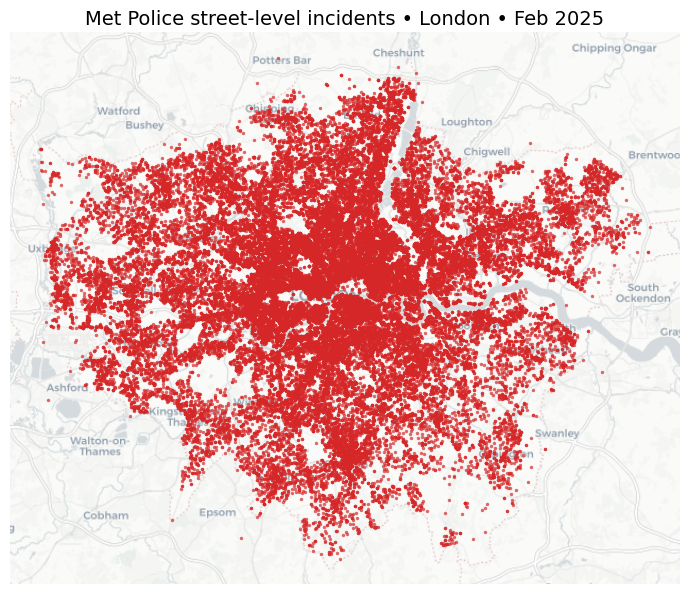

✓  Static map saved as  london_dots_static.png
✓  Interactive map saved as  london_dots_interactive.html


In [30]:
# --------------------------------------------------------
# 0.  INSTALL (only once) – uncomment if the libs are missing
# --------------------------------------------------------
# %pip install pandas geopandas contextily folium matplotlib

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import folium
from pathlib import Path

# Filter to only include years 2010–2014
df["Year"] = pd.to_datetime(df["Month"], errors="coerce").dt.year
df = df[df["Year"].between(2024, 2025)]
print(f"→ {len(df):,} rows between 2010 and 2014 retained")


# --------------------------------------------------------
# 2.  KEEP ONLY LONDON-AREA POINTS  (drop obvious outliers)
# --------------------------------------------------------
london = df[
    (df["Longitude"].between(-0.55, 0.30))  # west ↔ east
    & (df["Latitude"].between(51.25, 51.70))  # south ↔ north
].copy()

print(f"→ {len(london):,} rows kept inside the Greater-London bbox")

# --------------------------------------------------------
# 3A.  STATIC PNG MAP
# --------------------------------------------------------
# 3A-1  Re-project to Web-Mercator (EPSG:3857) for basemap tiles
gdf = gpd.GeoDataFrame(
    london,
    geometry=gpd.points_from_xy(london["Longitude"], london["Latitude"]),
    crs="EPSG:4326",
).to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(7, 9))

# 3A-2  Plot the points
gdf.plot(
    ax=ax,
    markersize=6,
    color="tab:red",
    alpha=0.7,
    linewidth=0,
)

# 3A-3  Add a background map
#       – default to CartoDB.Positron (light grey);
#       – if your xyzservices catalogue still has Stamen.TonerLite you can swap it in.
try:
    basemap_source = cx.providers.CartoDB.Positron
    cx.add_basemap(ax, source=basemap_source, attribution=False)
except Exception as e:
    print("Basemap error → falling back to plain axes:", e)

ax.set_axis_off()
ax.set_title("Met Police street-level incidents • London • Feb 2025", fontsize=14)
plt.tight_layout()
fig.savefig("london_dots_static.png", dpi=200)
plt.show()

print("✓  Static map saved as  london_dots_static.png")

# --------------------------------------------------------
# 3B.  INTERACTIVE LEAFLET MAP (HTML)
# --------------------------------------------------------
m = folium.Map(location=[51.5072, -0.1276], zoom_start=11, tiles="OpenStreetMap")

for _, row in london.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        color="#d73027",
        weight=0,
        fill=True,
        fill_opacity=0.7,
        popup=row.get("Crime type", ""),  # remove or customise as you like
    ).add_to(m)

m.save("london_dots_interactive.html")
print("✓  Interactive map saved as  london_dots_interactive.html")

In [38]:
# --------------------------------------------------------
# 0. INSTALL if needed
# --------------------------------------------------------
# %pip install pandas geopandas folium matplotlib contextily

import pandas as pd
import folium
from folium.plugins import HeatMap
from pathlib import Path

# --------------------------------------------------------
# 1. LOAD DATA
# --------------------------------------------------------
csv_path = Path(r"C:\\Users\\20231413\\OneDrive - TU Eindhoven\\CBL - group 23\\2. Data\\all_burglary.csv")

# Read with low_memory=False to avoid DtypeWarning
df = pd.read_csv(csv_path, low_memory=False)

# Extract the year from the 'Month' column
df["Year"] = pd.to_datetime(df["Month"], errors="coerce").dt.year

# Filter to years 2010–2014
df = df[df["Year"].between(2022, 2025)]
print(f"→ {len(df):,} rows between 2022 and 2025 retained")

# --------------------------------------------------------
# 2. FILTER BURGLARIES IN GREATER LONDON
# --------------------------------------------------------
df = df[df["Crime type"].str.lower().str.contains("burglary", na=False)]

# Bounding box for Greater London (rough approximation)
df = df[
    (df["Longitude"].between(-0.55, 0.30)) &
    (df["Latitude"].between(51.25, 51.70))
].copy()

print(f"→ {len(df):,} burglary incidents retained for heatmap")

# --------------------------------------------------------
# 3. CREATE INTERACTIVE HEATMAP
# --------------------------------------------------------
# Center the map on London
m = folium.Map(location=[51.5072, -0.1276], zoom_start=11, tiles="CartoDB positron")

# Convert to list of [lat, lon] points
heat_data = df[["Latitude", "Longitude"]].dropna().values.tolist()

# Add heatmap layer
HeatMap(
    heat_data,
    radius=10,
    blur=15,
    min_opacity=0.4,
).add_to(m)

# Save the output
m.save("london_burglary_heatmap22_25.html")
print("✓ Heatmap saved as london_burglary_heatmap.html")


→ 170,594 rows between 2022 and 2025 retained
→ 167,316 burglary incidents retained for heatmap
✓ Heatmap saved as london_burglary_heatmap.html


In [18]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import sys
!{sys.executable} -m pip install seaborn
